In [540]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [541]:
df = pd.read_csv('data/iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [542]:
print(f'na:\n{df.isna().sum()}')
print(f'null:\n{df.isnull().sum()}')
print(f'duplicated:\n{df.duplicated().sum()}')

na:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
null:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
duplicated:
0


In [543]:
df = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']]

In [544]:
df.shape

(150, 5)

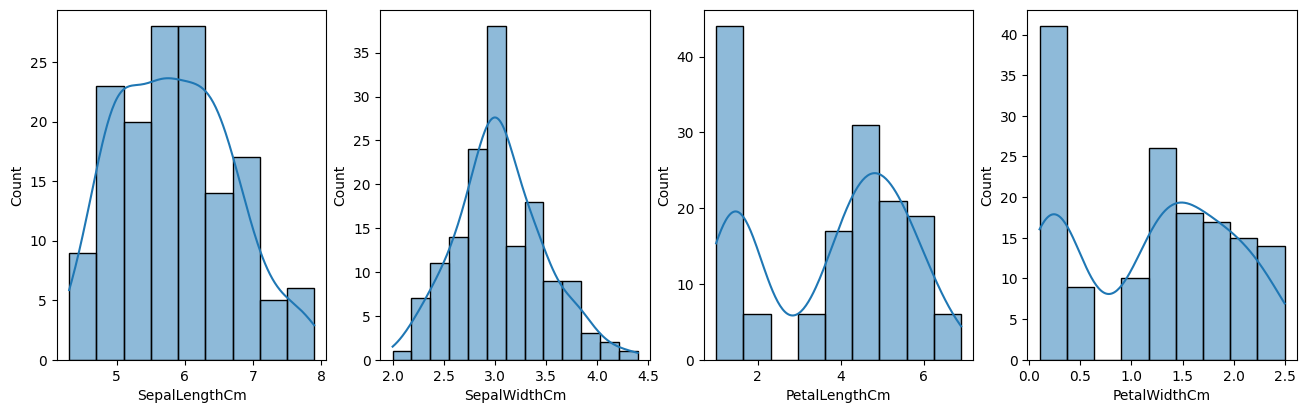

In [545]:
fig = plt.figure(figsize=(16,10))
for i in range(len(df.iloc[:, :-1].columns)):
    col = df.columns[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.histplot(data=df, x=col, kde=True)


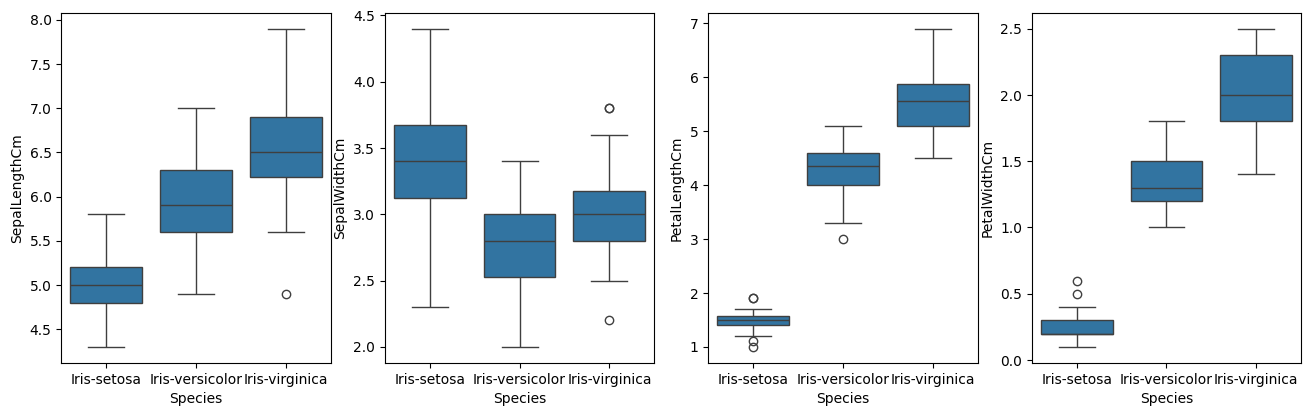

In [546]:
fig = plt.figure(figsize=(16,10))
for i in range(len(df.iloc[:, :-1].columns)):
    col = df.columns[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.boxplot(data=df, x='Species', y=col)


In [547]:
# sử dụng encoder và scaler nếu cần

In [548]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2) # test size và random state theo yêu cầu đề

In [549]:
X_train.index

Index([ 22,  15,  65,  11,  42, 146,  51,  27,   4,  32,
       ...
        87,  74, 121, 149,  20,  71, 106,  14,  92, 102],
      dtype='int64', length=120)

In [550]:
X_test.index

Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,   9,
        19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145, 108, 143,
        45,  30],
      dtype='int64')

In [551]:
knn = KNeighborsClassifier(n_neighbors=9) # số lượng neighbors theo đề yêu cầu

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [552]:
distances, indicies = knn.kneighbors(X_test)

In [553]:
indicies # các index gần nhất theo các mẫu trong tập test

array([[ 79,  90,  39,  73,  80, 111,  92,  16,  62],
       [ 48,  14,  94, 114,  13,  41, 117,  84,   7],
       [ 24,  21,  64,  96, 106,  37, 119,  69,  19],
       [ 90,  79,  86,  39,  22,  42,  20,  81, 111],
       [ 92,  12, 105,  80,  54,  82,  18,   2,  16],
       [114,   7,  26,  71,  14,  35,  94,  33,  23],
       [ 88,  95, 108,  89, 118,  65,  53,  15,  20],
       [ 85,  76,  87,  83, 103,  61,  54,  97, 100],
       [110,  73,  68,  80,   5,  30,  81,  44,  79],
       [118, 108,  25, 115,  34,  20,  65,  95,  36],
       [ 87,  83,  54,  17, 109,  85,  76,  50,  46],
       [104,  55, 102,  78,  70,  38,  32,  52,  51],
       [ 14,  26,  94,   7,  23, 114,  71,  13,  35],
       [ 55, 102, 104,  32,  51,  78,  70,  57,  52],
       [ 98,  84,  94,   8,  71,  23,   7,  14,  27],
       [  6,  11,  90,  12,  59,  42,  79,  18,  81],
       [103,  97,  76,  61, 100, 109, 107,  77,  17],
       [ 53,  65,  15, 118,  47,  25,  34, 108,  88],
       [ 22,  93,  20,  34, 

In [554]:
distances # khoảng cách tương ứng đến các index

array([[0.2236068 , 0.3       , 0.43588989, 0.50990195, 0.50990195,
        0.51961524, 0.52915026, 0.53851648, 0.58309519],
       [0.33166248, 0.38729833, 0.46904158, 0.50990195, 0.51961524,
        0.54772256, 0.55677644, 0.6164414 , 0.6244998 ],
       [0.41231056, 0.54772256, 0.89442719, 0.92736185, 0.96436508,
        1.22065556, 1.2489996 , 1.2922848 , 1.3892444 ],
       [0.2       , 0.24494897, 0.33166248, 0.34641016, 0.41231056,
        0.43588989, 0.46904158, 0.47958315, 0.48989795],
       [0.31622777, 0.34641016, 0.34641016, 0.37416574, 0.42426407,
        0.45825757, 0.48989795, 0.50990195, 0.59160798],
       [0.28284271, 0.3       , 0.3       , 0.34641016, 0.36055513,
        0.36055513, 0.37416574, 0.38729833, 0.38729833],
       [0.4472136 , 0.50990195, 0.51961524, 0.54772256, 0.54772256,
        0.57445626, 0.58309519, 0.6       , 0.60827625],
       [0.36055513, 0.46904158, 0.51961524, 0.54772256, 0.54772256,
        0.60827625, 0.64807407, 0.69282032, 0.69282032],


In [555]:
y_pred_proba = knn.predict_proba(X_test)
y_pred_proba

array([[0.        , 0.88888889, 0.11111111],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.77777778, 0.22222222],
       [0.        , 0.88888889, 0.11111111],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.11111111, 0.88888889],
       [0.        , 0.55555556, 0.44444444],
       [0.        , 1.        , 0.        ],
       [0.        , 0.11111111, 0.88888889],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.77777778, 0.22222222],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.

In [556]:
y_pred = knn.predict(X_test)

In [557]:
knn.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [558]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'confusion_matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'classification_report:\n{classification_report(y_test, y_pred)}')

accuracy_score: 1.0
confusion_matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
classification_report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [559]:
# các điểm thì precision là điểm dự đoán true positive (mức độ chính xác)
# reacll là điểm dự đoán false positve, điểm sai lệch (mức độ bỏ sót)

# trong các bài dự đoán bệnh thì recall của mức có bệnh quan trọng vì không được dự đoán sai người có bệnh thành không bệnh (không bỏ sót người có bệnh)

In [560]:
df = pd.read_csv('data/drug200.csv')
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [561]:
# sex one hot encoder 
# bp và cholesterol label encoder

In [562]:
print(f'na:\n{df.isna().sum()}')
print(f'null:\n{df.isnull().sum()}')
print(f'duplicated:\n{df.duplicated().sum()}')

na:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
null:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
duplicated:
0


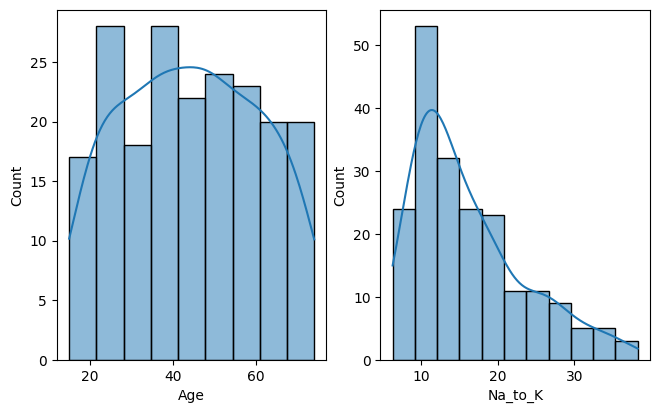

In [563]:
fig = plt.figure(figsize=(16,10))
columns = ['Age', 'Na_to_K']
for i in range(len(columns)):
    col = columns[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.histplot(data=df, x=col, kde=True)

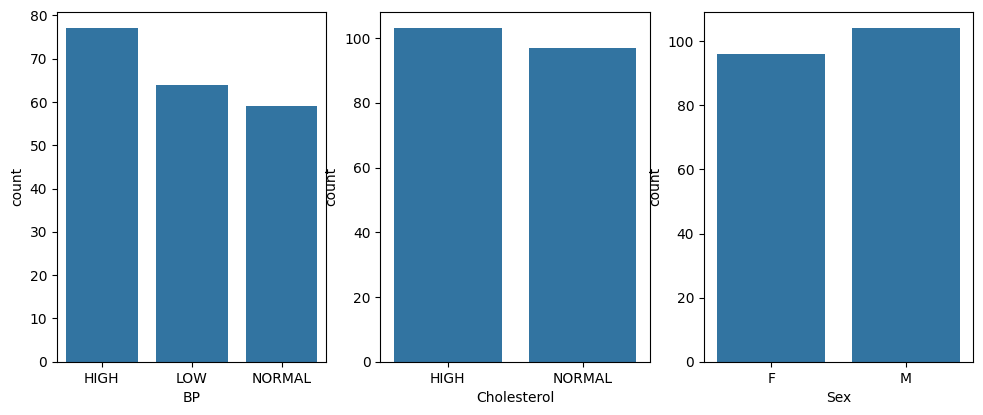

In [564]:
fig = plt.figure(figsize=(16,10))
columns = ['BP', 'Cholesterol', 'Sex']
for i in range(len(columns)):
    col = columns[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.countplot(data=df, x=col)

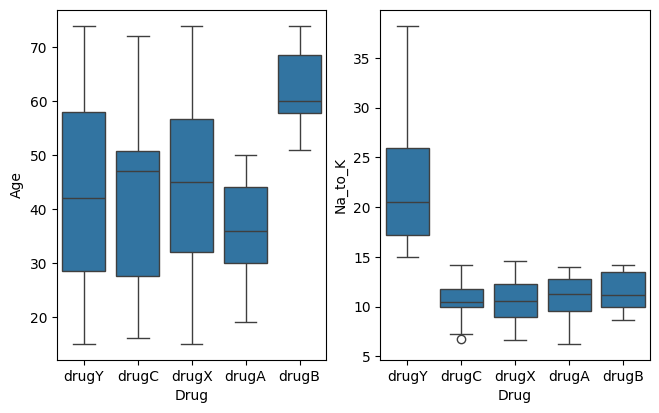

In [565]:
fig = plt.figure(figsize=(16,10))
columns = ['Age', 'Na_to_K']
for i in range(len(columns)):
    col = columns[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.boxplot(data=df, x='Drug', y=col)

In [566]:
sex_encoder = OneHotEncoder(sparse_output=False)
bp_encoder = LabelEncoder()
cholesterol_encoder = LabelEncoder()

sex_encoded = sex_encoder.fit_transform(df[['Sex']])
sex_df = pd.DataFrame(sex_encoded, columns=sex_encoder.get_feature_names_out(sex_encoder.feature_names_in_))

df = pd.concat([df.drop('Sex', axis=1), sex_df], axis=1)
df['BP'] = bp_encoder.fit_transform(df['BP'])
df['Cholesterol'] = cholesterol_encoder.fit_transform(df['BP'])
df

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_F,Sex_M
0,23,0,0,25.355,drugY,1.0,0.0
1,47,1,1,13.093,drugC,0.0,1.0
2,47,1,1,10.114,drugC,0.0,1.0
3,28,2,2,7.798,drugX,1.0,0.0
4,61,1,1,18.043,drugY,1.0,0.0
...,...,...,...,...,...,...,...
195,56,1,1,11.567,drugC,1.0,0.0
196,16,1,1,12.006,drugC,0.0,1.0
197,52,2,2,9.894,drugX,0.0,1.0
198,23,2,2,14.020,drugX,0.0,1.0


In [567]:
X = df[['Age','BP','Cholesterol','Na_to_K','Sex_F','Sex_M']]
y = df[['Drug']]

In [568]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21) # test size và random state theo yêu cầu đề

In [569]:
X_train.index

Index([176, 111, 114,  14, 106,  85, 167, 195,  26, 135,
       ...
       110,  72,  98, 188, 163, 120, 112,  48,   4,  56],
      dtype='int64', length=160)

In [570]:
X_test.index

Index([144,   9,  17,  20,  45,   6,  52,  91, 129, 183,  21,  42, 105, 145,
        87, 152, 124,  92, 101,  13, 108,  75,  40, 198, 191, 192, 194, 117,
         2, 131,  19, 143, 147,  22, 102,  60, 136, 168, 138,  54],
      dtype='int64')

In [571]:
# Su dung scaler neu co yeu cau

In [572]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10) # max depth va ma leaf node theo yeu cau
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

[Text(0.5555555555555556, 0.9285714285714286, 'Na_to_K <= 14.829\nentropy = 1.969\nsamples = 160\nvalue = [18, 11, 14, 47, 70]\nclass = drugY'),
 Text(0.4444444444444444, 0.7857142857142857, 'Cholesterol <= 0.5\nentropy = 1.742\nsamples = 90\nvalue = [18, 11, 14, 47, 0]\nclass = drugX'),
 Text(0.5, 0.8571428571428572, 'True  '),
 Text(0.2222222222222222, 0.6428571428571429, 'Age <= 53.5\nentropy = 0.958\nsamples = 29\nvalue = [18, 11, 0, 0, 0]\nclass = drugA'),
 Text(0.1111111111111111, 0.5, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]\nclass = drugA'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]\nclass = drugB'),
 Text(0.6666666666666666, 0.6428571428571429, 'Cholesterol <= 1.5\nentropy = 0.777\nsamples = 61\nvalue = [0, 0, 14, 47, 0]\nclass = drugX'),
 Text(0.5555555555555556, 0.5, 'Na_to_K <= 10.688\nentropy = 0.993\nsamples = 31\nvalue = [0, 0, 14, 17, 0]\nclass = drugX'),
 Text(0.3333333333333333, 0.35714285714285715, 'Na_to_K <=

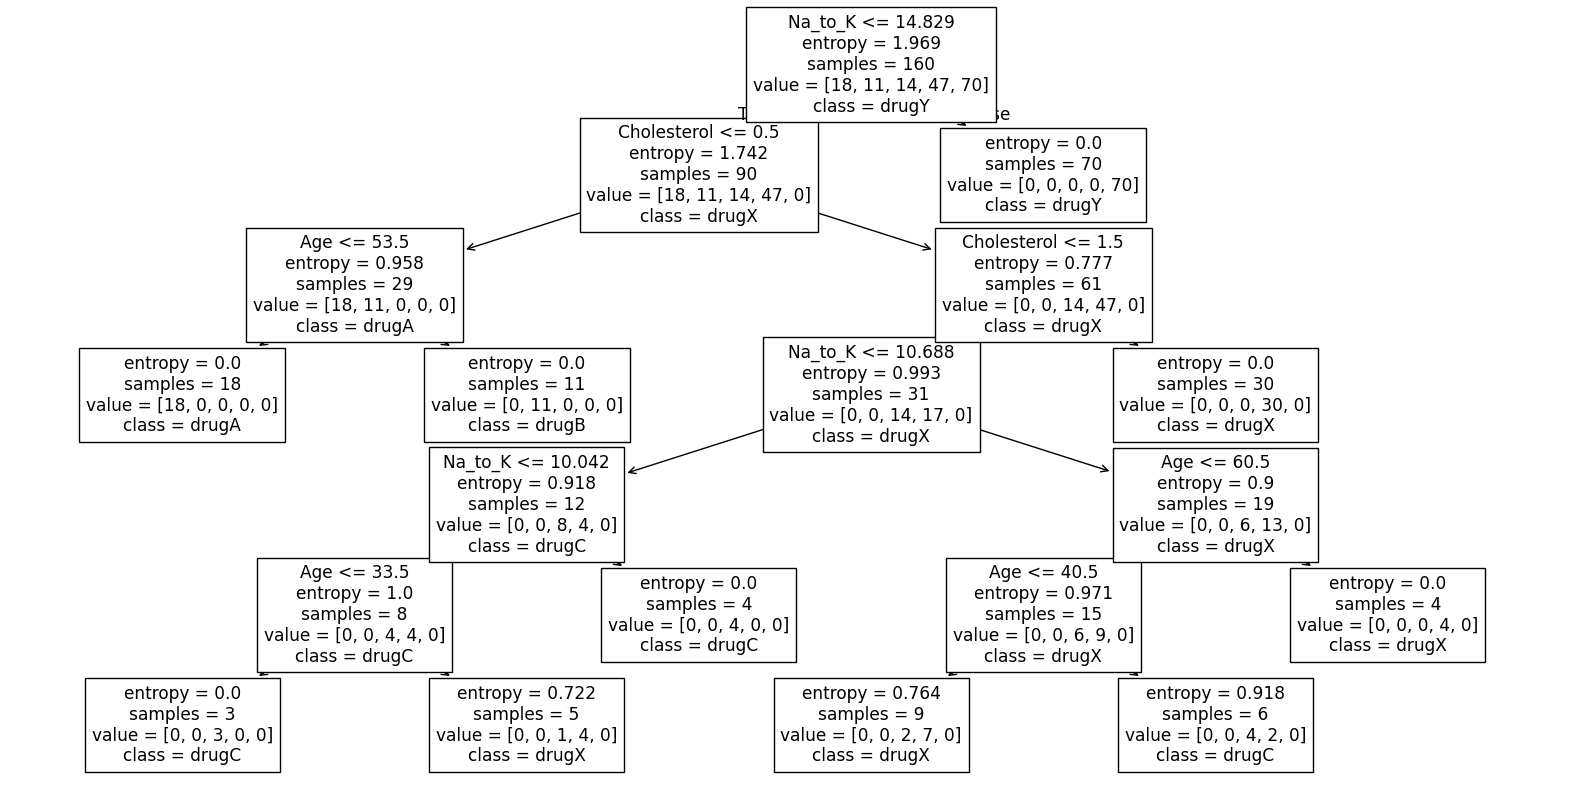

In [573]:
plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=dtc.feature_names_in_, class_names=dtc.classes_)

In [574]:
y_pred = dtc.predict(X_test)

In [575]:
y_pred

array(['drugA', 'drugY', 'drugA', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugA', 'drugY', 'drugB',
       'drugY', 'drugY', 'drugX', 'drugA', 'drugY', 'drugY', 'drugX',
       'drugC', 'drugY', 'drugY', 'drugY', 'drugA', 'drugY', 'drugX',
       'drugY', 'drugB', 'drugY', 'drugA', 'drugB'], dtype=object)

In [576]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'confusion_matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'classification_report:\n{classification_report(y_test, y_pred)}')

accuracy_score: 0.925
confusion_matrix:
[[ 5  0  0  0  0]
 [ 2  3  0  0  0]
 [ 0  0  1  1  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 21]]
classification_report:
              precision    recall  f1-score   support

       drugA       0.71      1.00      0.83         5
       drugB       1.00      0.60      0.75         5
       drugC       1.00      0.50      0.67         2
       drugX       0.88      1.00      0.93         7
       drugY       1.00      1.00      1.00        21

    accuracy                           0.93        40
   macro avg       0.92      0.82      0.84        40
weighted avg       0.94      0.93      0.92        40



In [577]:
df = pd.read_csv('data/iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [578]:
df = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']]

In [579]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [580]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [581]:
X_train.index

Index([ 22,  15,  65,  11,  42, 146,  51,  27,   4,  32,
       ...
        87,  74, 121, 149,  20,  71, 106,  14,  92, 102],
      dtype='int64', length=120)

In [582]:
X_test.index

Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,   9,
        19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145, 108, 143,
        45,  30],
      dtype='int64')

In [583]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [584]:
y_pred_proba = gnb.predict_proba(X_test)
y_pred_proba

array([[3.45143261e-089, 9.95635767e-001, 4.36423301e-003],
       [1.00000000e+000, 5.15898715e-014, 6.80979688e-021],
       [1.85119405e-286, 4.92947613e-012, 1.00000000e+000],
       [5.12239858e-093, 9.77593559e-001, 2.24064412e-002],
       [1.39227751e-104, 8.70022596e-001, 1.29977404e-001],
       [1.00000000e+000, 1.74988354e-013, 3.69993337e-021],
       [4.48134146e-052, 9.99955645e-001, 4.43550046e-005],
       [1.28995420e-173, 1.18219872e-006, 9.99998818e-001],
       [8.23961555e-095, 9.92158276e-001, 7.84172366e-003],
       [1.76265413e-058, 9.99938983e-001, 6.10171853e-005],
       [1.19921461e-149, 5.88867020e-004, 9.99411133e-001],
       [1.00000000e+000, 1.88255837e-017, 4.35192527e-025],
       [1.00000000e+000, 4.35756152e-017, 1.91890399e-024],
       [1.00000000e+000, 4.90428647e-017, 1.71652749e-024],
       [1.00000000e+000, 9.42503636e-017, 4.80676097e-024],
       [2.93164736e-106, 6.02930476e-001, 3.97069524e-001],
       [7.42676951e-201, 5.05656255e-007

In [585]:
gnb.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [586]:
gnb.epsilon_

3.0413270833333337e-09

In [587]:
y_pred = gnb.predict(X_test)

In [588]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'confusion_matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'classification_report:\n{classification_report(y_test, y_pred)}')

accuracy_score: 1.0
confusion_matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
classification_report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [589]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [590]:
df = df[['reading score','writing score']]

In [591]:
print(f'na:\n{df.isna().sum()}')
print(f'null:\n{df.isnull().sum()}')
print(f'duplicated:\n{df.duplicated().sum()}')

na:
reading score    0
writing score    0
dtype: int64
null:
reading score    0
writing score    0
dtype: int64
duplicated:
383


In [592]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='reading score', ylabel='writing score'>

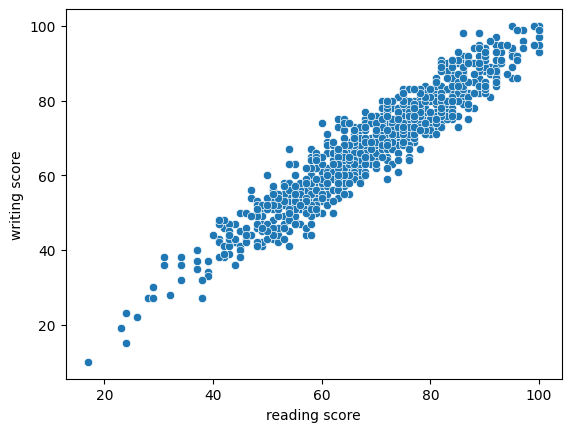

In [593]:
sns.scatterplot(data=df, x='reading score', y='writing score')

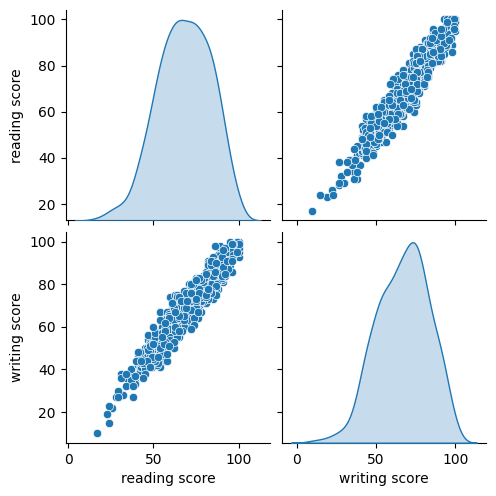

In [594]:
sns.pairplot(df[['reading score', 'writing score']], diag_kind='kde')

In [595]:
X = df[['reading score']]
y = df[['writing score']]

In [596]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [597]:
X_train.index

Index([805, 459, 200, 376, 227, 547, 361, 526, 505, 341,
       ...
       399, 245, 634, 137,  20,  75, 118, 321, 578, 113],
      dtype='int64', length=493)

In [598]:
X_test.index

Index([ 50, 910,  88, 365, 121, 974, 318, 439, 396, 587,
       ...
       689, 242, 557, 360, 485,   6, 116, 128, 178, 205],
      dtype='int64', length=124)

In [599]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [600]:
linear.intercept_

array([-0.10762534])

In [601]:
linear.coef_

array([[0.98666009]])

In [602]:
y_pred = linear.predict(X_test)

In [603]:
print(f'r2_score: {r2_score(y_test, y_pred)}')
print(f'mean_absolute_error: {mean_absolute_error(y_test, y_pred)}')
print(f'mean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'root_mean_squared_error: {root_mean_squared_error(y_test, y_pred)}')

r2_score: 0.896240264929353
mean_absolute_error: 4.088032410638399
mean_absolute_percentage_error: 0.06771760789454387
root_mean_squared_error: 4.907855999002667


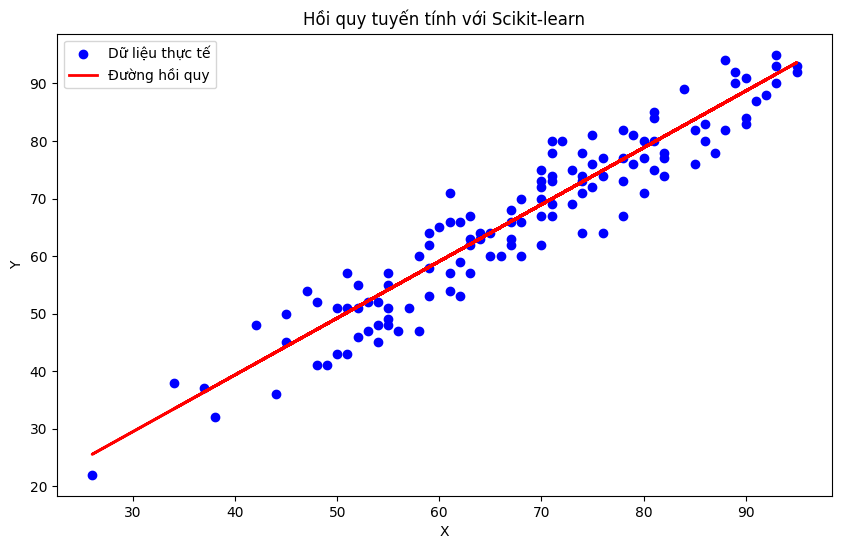

In [604]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, color='blue', label="Dữ liệu thực tế")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Đường hồi quy")

plt.title("Hồi quy tuyến tính với Scikit-learn")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [605]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [606]:
df = df[['math score','reading score','writing score']]

In [607]:
print(f'na:\n{df.isna().sum()}')
print(f'null:\n{df.isnull().sum()}')
print(f'duplicated:\n{df.duplicated().sum()}')

na:
math score       0
reading score    0
writing score    0
dtype: int64
null:
math score       0
reading score    0
writing score    0
dtype: int64
duplicated:
22


In [608]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='reading score', ylabel='writing score'>

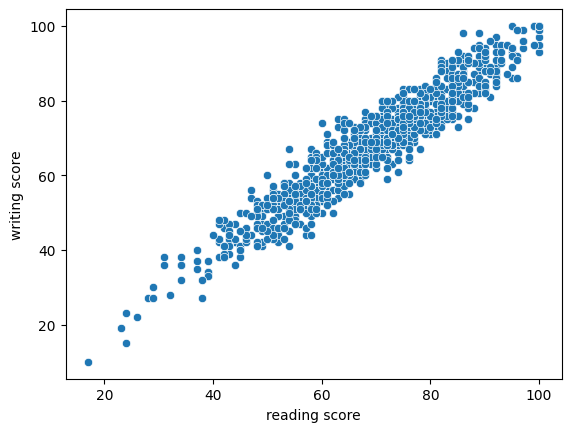

In [609]:
sns.scatterplot(data=df, x='reading score', y='writing score')

<Axes: xlabel='math score', ylabel='writing score'>

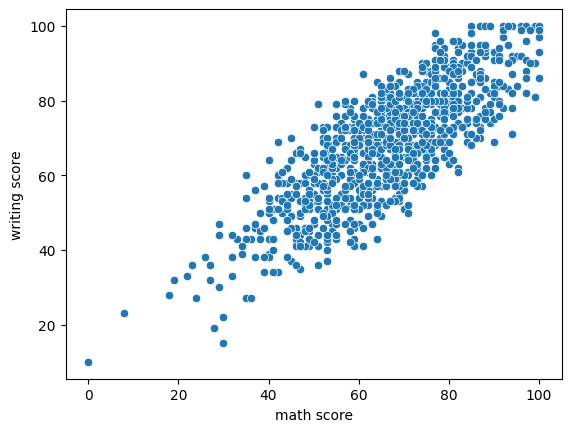

In [610]:
sns.scatterplot(data=df, x='math score', y='writing score')

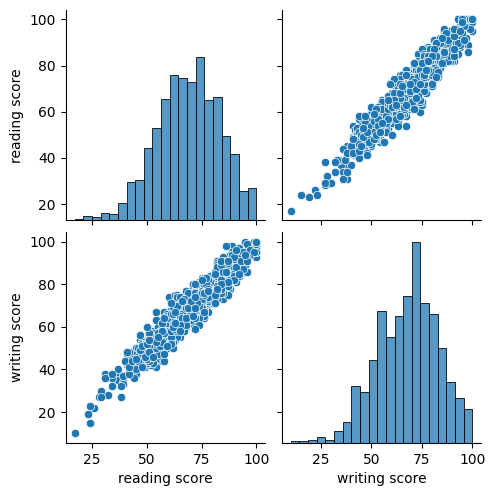

In [611]:
sns.pairplot(df[['reading score', 'writing score']])

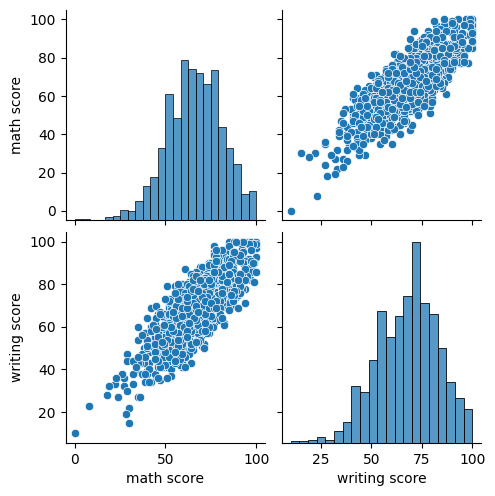

In [612]:
sns.pairplot(df[['math score', 'writing score']])

In [613]:
X = df[['math score', 'reading score']]
y = df[['writing score']]

In [614]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [615]:
X_train.index

Index([797, 925,  33,  31, 743, 192, 316, 588, 236, 307,
       ...
       121, 622,  20, 712,  71, 106, 272, 874, 439, 102],
      dtype='int64', length=782)

In [616]:
X_test.index

Index([199, 548, 174, 944,  66, 500, 764, 553, 607, 158,
       ...
       811,  49, 724, 365, 974, 363, 897, 530, 993, 994],
      dtype='int64', length=196)

In [617]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [618]:
linear.intercept_

array([-1.65796738])

In [619]:
linear.coef_

array([[0.06792005, 0.94058446]])

In [620]:
y_pred = linear.predict(X_test)

In [621]:
print(f'r2_score: {r2_score(y_test, y_pred)}')
print(f'mean_absolute_error: {mean_absolute_error(y_test, y_pred)}')
print(f'mean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'root_mean_squared_error: {root_mean_squared_error(y_test, y_pred)}')

r2_score: 0.9070180722212866
mean_absolute_error: 3.6444293913801067
mean_absolute_percentage_error: 0.05603559602646274
root_mean_squared_error: 4.5431736497230215
